In [1]:
import pandas as pd
import numpy as np 

import math
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Upload dataset

In [2]:
df = pd.read_csv("WinterGames.csv")
df.head()

,olympics,discipline,sex,age
0,2022,Snowboard,f,24
1,2022,Snowboard,f,28
2,2022,Snowboard,f,26
3,2022,Snowboard,f,26
4,2022,Snowboard,f,26


### Size of dataset

In [3]:
df.shape

(749, 4)

### Main statistical characteristics 

In [4]:
df.describe()

,olympics,age
count,749.000000,749.000000
mean,2017.855808,25.882510
std,3.250756,4.901661
min,2014.000000,17.000000
25%,2014.000000,22.000000
50%,2018.000000,26.000000
75%,2022.000000,29.000000
max,2022.000000,45.000000


### Number of male and female 

In [5]:
gender_counts = df.sex.value_counts()
gender_counts

m    403
f    346
Name: sex, dtype: int64

In [6]:
gender_counts = df.discipline.value_counts()
gender_counts

Ski          559
Snowboard    190
Name: discipline, dtype: int64

### Checking null values 

In [7]:
df.isnull().sum()

olympics      0
discipline    0
sex           0
age           0
dtype: int64

### General Age Distribution

(array([  0.,   0.,   0.,   7.,  52.,  85., 112., 117., 125.,  93.,  66.,
         40.,  22.,  15.,   7.,   1.,   4.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

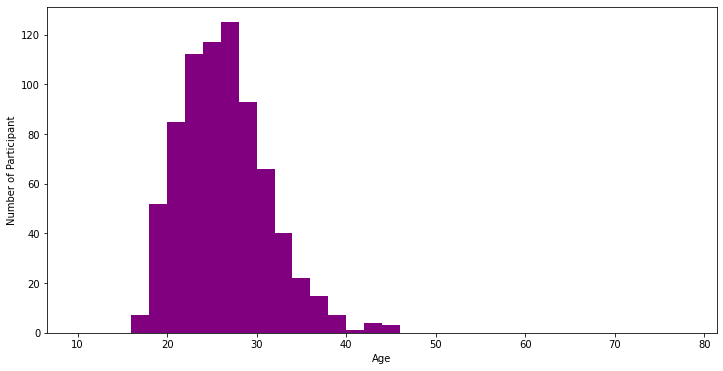

In [8]:
plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(df.age, bins=np.arange(10,80,2), color='purple')

# Stege 1. Compare age of snowboarders with skiers participating in the Winter Olympic

### Calculate average age

In [9]:
# Separation of data into groups by gender and discipline. 
m_snowboard = df[(df.sex == "m") & (df.discipline == 'Snowboard')]
m_ski = df[(df.sex == 'm') & (df.discipline == 'Ski')]
f_snowboard = df[(df.sex == 'f') & (df.discipline == 'Snowboard')]
f_ski = df[(df.sex == 'f') & (df.discipline == 'Ski')]

In [10]:
print ('The average age of men snowboard:       ', m_snowboard['age' ]. mean ())
print ('The average age of men ski:             ', m_ski['age']. mean ())
print ('The average age of women snowboard:     ', f_snowboard['age']. mean ())
print ('The average age of women ski:           ', f_ski['age']. mean ())

The average age of men snowboard:        29.583333333333332
The average age of men ski:              25.469055374592834
The average age of women snowboard:      26.872340425531913
The average age of women ski:            24.607142857142858


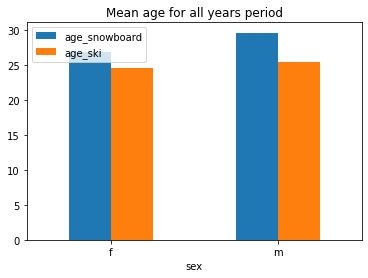

In [11]:
#  plot it

df_snowboard = df[(df['discipline'] == 'Snowboard')]
df_ski = df[(df['discipline'] == 'Ski')]

df_snowboard_1 = df_snowboard.groupby('sex')['age'].mean()
df_ski_1 = df_ski.groupby('sex')['age'].mean()

df_merged=pd.merge(df_snowboard_1, df_ski_1, on=['sex'])
df_merged.rename(columns={'sex': 'sex', 
                              'age_x': 'age_snowboard', 
                              'age_y': 'age_ski'}, inplace=True)

ax = df_merged.plot.bar(title="Mean age for all years period", rot=0)

In [12]:
df_snowboard.describe()

,olympics,age
count,190.000000,190.000000
mean,2017.978947,28.242105
std,3.278853,5.346642
min,2014.000000,18.000000
25%,2014.000000,24.000000
50%,2018.000000,28.000000
75%,2022.000000,32.000000
max,2022.000000,45.000000


In [13]:
df_ski.describe()

,olympics,age
count,559.000000,559.000000
mean,2017.813953,25.080501
std,3.243038,4.470408
min,2014.000000,17.000000
25%,2014.000000,22.000000
50%,2018.000000,25.000000
75%,2022.000000,28.000000
max,2022.000000,44.000000


## Sample Variance

In [14]:
ml = df[(df.sex == 'm')]
fm = df[(df.sex == 'f')]

snowboard_mu = df_snowboard['age' ]. mean ()
ski_mu = df_ski['age' ]. mean ()
snowboard_var = df_snowboard['age']. var ()
ski_var = df_ski['age']. var ()
snowboard_std = df_snowboard['age']. std ()
ski_std = df_ski['age']. std ()
print ('Statistics of age for snowboard: mu:', snowboard_mu , 'var: ', snowboard_var , 'std: ', snowboard_std)
print ('Statistics of age for ski : mu:', ski_mu , 'var: ', ski_var , 'std:', ski_std)

Statistics of age for snowboard: mu: 28.242105263157896 var:  28.58657755499861 std:  5.346641708119089
Statistics of age for ski : mu: 25.08050089445438 var:  19.98454741890601 std: 4.470407970074545


In [15]:
# create table
data = {'mean': [snowboard_mu, ski_mu],
        'var': [snowboard_var, ski_var],
       'std': [snowboard_std, ski_std]}
 
df_statistic = pd.DataFrame(data, index=['snowboard',
                               'ski'])
 
df_statistic

,mean,var,std
snowboard,28.242105,28.586578,5.346642
ski,25.080501,19.984547,4.470408


## Skewness: Measuring Asymmetry

In [16]:
# Skewness Function

def skewness(x):
    res = 0 
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

# Here we applied skewness function to a data without outiers that we defined later
print (" Skewness of the snowboard age =  ", skewness ( df_snowboard['age'] ))
print (" Skewness of the ski age =        ", skewness ( df_ski['age'] ))


 Skewness of the snowboard age =   0.45541018409353945
 Skewness of the ski age =         0.7101168052434921


## Age distribution by groups

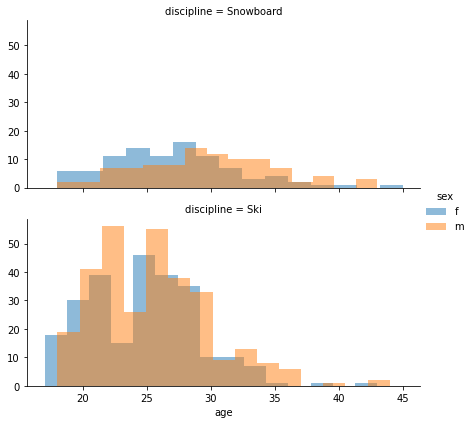

In [17]:
g = sns.FacetGrid(df, row='discipline',  aspect=2, hue = 'sex')  # col ='olympics'
g.map(plt.hist, 'age', bins=15, alpha=.5) # color ='skyblue'
g.add_legend()

## Probability mass function

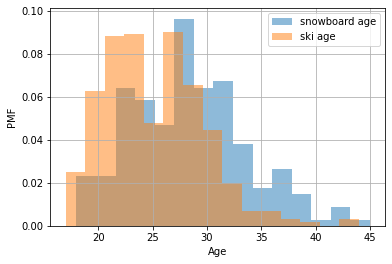

In [18]:
snowboard_age = df_snowboard['age']
ski_age = df_ski['age']

snowboard_age.hist( histtype='stepfilled', density=True, alpha=.5, bins=15, label="snowboard age")   # default number of bins = 10
ski_age.hist( histtype='stepfilled', density=True, alpha=.5, bins=15, label="ski age")
plt.xlabel('Age')
plt.ylabel('PMF')
plt.legend()
plt.show()

## Handling outliers

In [19]:
def drop_numerical_outliers(df, z_thresh=2):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df_snowboard)
drop_numerical_outliers(df_ski)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


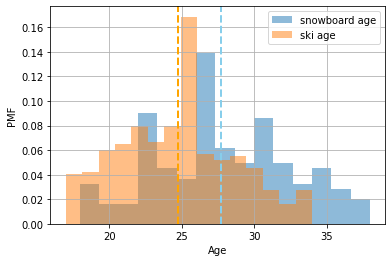

In [20]:
snowboard_age = df_snowboard['age']
ski_age = df_ski['age']

snowboard_age.hist( histtype='stepfilled', density=True, alpha=.5, bins=15, label="snowboard age")   # default number of bins = 10
ski_age.hist( histtype='stepfilled', density=True, alpha=.5, bins=15, label="ski age")

# add mean line
plt.axvline(snowboard_age.mean(), color='skyblue', linestyle='dashed', linewidth=2)
plt.axvline(ski_age.mean(), color='orange', linestyle='dashed', linewidth=2)

plt.xlabel('Age')
plt.ylabel('PMF')
plt.legend()
plt.show()

# Stege 2. Compare age of female snowboarders with female skiers 

In [21]:
df_female = df[(df['sex'] == 'f')]

df_female_snowboard = df_female[(df_female['discipline'] == 'Snowboard')]
df_female_ski = df_female[(df_female['discipline'] == 'Ski')]


In [22]:
df_female_snowboard['age'].describe().round(0)

count    94.0
mean     27.0
std       5.0
min      18.0
25%      24.0
50%      26.0
75%      29.0
max      45.0
Name: age, dtype: float64

In [23]:
df_female_ski['age'].describe().round(0)

count    252.0
mean      25.0
std        4.0
min       17.0
25%       21.0
50%       25.0
75%       28.0
max       43.0
Name: age, dtype: float64

<BarContainer object of 346 artists>

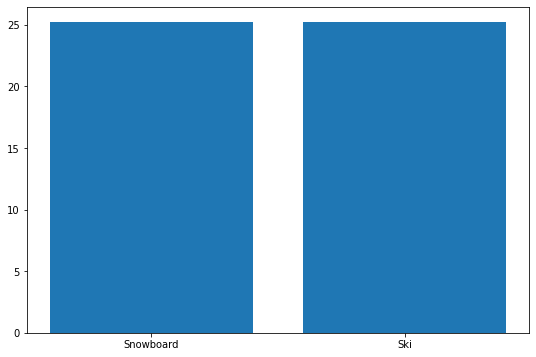

In [24]:
plt.figure(figsize=(9,6))
plt.bar(x=df_female['discipline'], height=df_female['age'].mean())

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


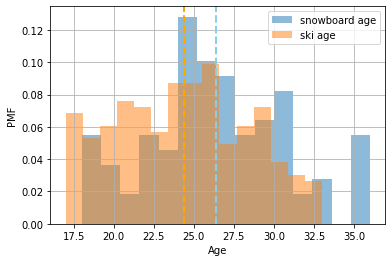

In [25]:
drop_numerical_outliers(df_female_snowboard)
drop_numerical_outliers(df_female_ski)

snowboard_age = df_female_snowboard['age']
ski_age = df_female_ski['age']

# drop_numerical_outliers(snowboard_age)
# drop_numerical_outliers(ski_age)

snowboard_age.hist( histtype='stepfilled', density=True, alpha=.5, bins=15, label="snowboard age")   # default number of bins = 10
ski_age.hist( histtype='stepfilled', density=True, alpha=.5, bins=15, label="ski age")

# add mean line
plt.axvline(snowboard_age.mean(), color='skyblue', linestyle='dashed', linewidth=2)
plt.axvline(ski_age.mean(), color='orange', linestyle='dashed', linewidth=2)

plt.xlabel('Age')
plt.ylabel('PMF')
plt.legend()
plt.show()